In [137]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
sns.set(rc={'figure.figsize': (9,6)})

In [139]:
events = pd.read_csv('C:/event_data_train.csv')
events.head()

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632


In [140]:
submissions = pd.read_csv(BaseException'https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')
submissions.head()

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853


In [141]:
events.shape

(3480703, 4)

In [142]:
submissions.shape

(509104, 4)

In [143]:
events['date'] = pd.to_datetime(events.timestamp, unit='s')

In [144]:
events.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [145]:
events['day'] = events.date.dt.date
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


<AxesSubplot:xlabel='day'>

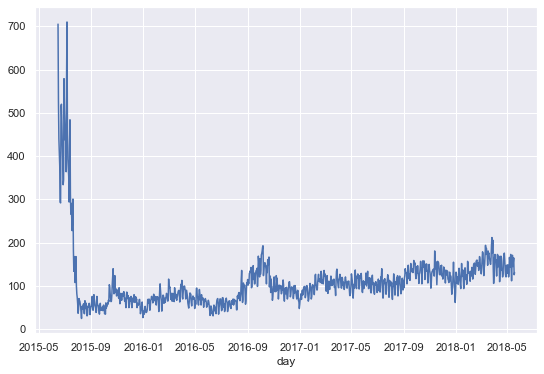

In [146]:
events.groupby('day') \
.user_id.nunique().plot()

In [147]:
events.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [170]:
# кол-во пройденных степов для каждого пользователя
users_event_data = events_pivot_steps = events.pivot_table(index='user_id', #в результате каждая строчка будет информацией о каждом уникальном index
                   columns='action', #столбцы будут отвеать за уникальные значения columns 
                   values='step_id', #в ячейках будет находиться информация по values
                   aggfunc='count', #сгруппированная по aggfunc
                   fill_value=0).reset_index() \
                
# сводная таблица показывает агрегированные значения столбца в values по каждому юзеру в каждой из колонок
# reset_index() используем для избавления от составных названий столбцов

In [171]:
users_event_data.head()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1


<AxesSubplot:>

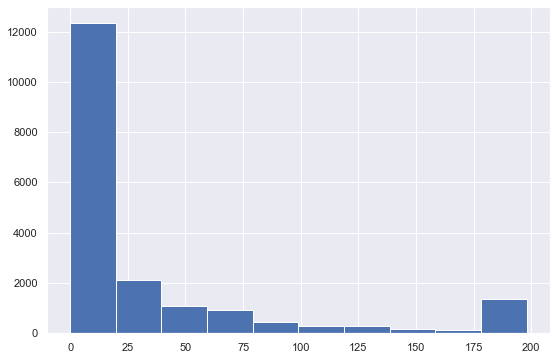

In [149]:
events_pivot_steps.passed.hist() # реальное распределение юзеров по кол-ву пройденных степов

In [150]:
submissions['date'] = pd.to_datetime(submissions.timestamp, unit='s')
submissions.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [151]:
submissions['day'] = submissions.date.dt.date
submissions.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [152]:
users_scores = submissions.pivot_table(index=['user_id'],
                        columns='submission_status',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

In [153]:
users_scores.sort_values('correct', ascending=False).head()

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42


In [154]:
events.user_id.nunique()

19234

In [155]:
submissions.user_id.nunique()

9940

In [156]:
submissions.groupby('user_id', as_index=False) \
           .agg({'step_id':'nunique', 'submission_status':'count'}) \
           .query('step_id == 1') \
           .sort_values('submission_status', ascending=False) \
           .rename(columns={'step_id':'unique_steps', 'submission_status':'submissions'}) \
           .head(10) # юзеры с одним выполненным уникальным степом и кол-во попыток на нем

,user_id,unique_steps,submissions
9305,25149,1,60
8842,23879,1,23
7172,19305,1,20
5609,14970,1,16
249,648,1,9
2521,6628,1,8
1415,3657,1,8
3814,10161,1,8
6362,16983,1,8
5751,15353,1,8


In [157]:
# посмотрим на распределение перерывов юзеров
# удаляем дубликаты, чтобы оставить только те данные, в которых юзер сделал что то на курсе 1 раз за день
# np.diff считает разницу между ближайшими наблюдениями
gap_data = events[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']).groupby('user_id')['timestamp'] \
                                       .apply(list).apply(np.diff).values

In [158]:
new_gap_data = pd.Series(np.concatenate(gap_data, axis=0))
day_diff = new_gap_data / (24 * 60 * 60)
day_diff

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

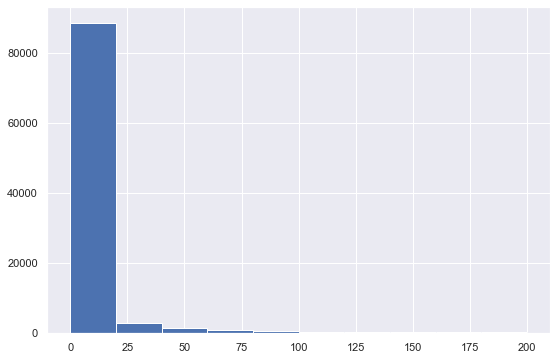

In [159]:
day_diff[day_diff < 200].hist()

In [160]:
day_diff.quantile(0.95)

59.760440972222156

In [161]:
events.groupby('user_id').agg({'action':'count'}).sort_values('action', ascending=False)

,action
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905
...,...
19546,2
1,2
11437,1


In [162]:
submissions.groupby('user_id').agg({'submission_status':'count'}).sort_values('submission_status', ascending=False)

,submission_status
user_id,
12265,1051
3643,948
1046,934
14454,920
643,888
...,...
10652,1
10505,1
10502,1


In [163]:
users_data = events.groupby('user_id', as_index=False) \
      .agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [164]:
events.timestamp.max()
drop_out_treshold = 30 * 24 * 60 * 60

In [165]:
users_data['is_gone_user'] = (events.timestamp.max() - users_data.last_timestamp) > drop_out_treshold 

In [166]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [167]:
users_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [179]:
users_days = events.groupby('user_id', as_index=False).day.nunique()

In [180]:
users_days.head()

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1


In [168]:
users_data = users_data.merge(users_scores, on = 'user_id', how='outer').fillna(0)

In [169]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0


In [173]:
users_data = users_data.merge(users_event_data, on='user_id', how='outer').fillna(0)
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1


In [181]:
users_data = users_data.merge(users_days, on='user_id', how='outer').fillna(0)

In [182]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1


In [183]:
users_data.user_id.nunique()

19234

In [184]:
users_data['passed_course'] = users_data.passed > 170
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,day,passed_course
0,1,1472827464,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,1,False


In [185]:
users_data.passed_course.value_counts(normalize=True)

False    0.925912
True     0.074088
Name: passed_course, dtype: float64